## Classification

Classification is a type of supervised learning in machine learning, where the goal is to predict the class or category of a given data point based on its features. In other words, classification is the process of assigning a label or category to a new observation based on a set of predefined categories.

There are various algorithms used for classification, including decision trees, logistic regression, naive Bayes, support vector machines (SVM), and artificial neural networks (ANN). The choice of algorithm depends on the nature of the data and the problem at hand.

#### Gender Classification Problem / Example

Here in the fallowing dataset we have info about random peoples, their height, weight and shoe size. Every person has a label of their gender as `male` or `female`. 

| Height (cm) | Weight (kg) | Shoe Size | Gender |
| ----------- | ----------- | -------------- | ------ |
| 178         | 75          | 9.5            | Male   |
| 165         | 60          | 8              | Female |
| 185         | 80          | 10             | Male   |
| 155         | 50          | 7              | Female |
| 172         | 72          | 9              | Male   |
| 160         | 55          | 7.5            | Female |

This is a `classification` problem because we are predicting the gender of a person depending upon their height, weight and shoe size

Now our task is to create a Supervised ML Modal which will take person's height, weight and shoe size as input and will predict their gender, hence a label, either _male_ or _female_

#### Libraries We're Using

Here we are importing `numpy` for generating random data, `sklearn.metrics` for evaluating our modal's prediction accuracy and `matplotlib.pyplot` for graphically visualising our modal's predictions

In [55]:
import numpy as np # For numerical computing
from sklearn.metrics import accuracy_score # For evaluating accuracy of our modals
import matplotlib.pyplot as plt # For graphical visualization
import pandas as pd # Working with our data

np.__version__

'1.21.5'

#### Data Preprocessing

In [56]:
df = pd.read_csv('../../../ds/gender_classification.csv')


gender_dataset_labels = df['gender'].tolist()

gender_dataset = df.drop(['gender', 'Unnamed: 0'], axis=1).values

gender_dataset[-1:], gender_dataset_labels[-1:]


(array([[175.,  75.,  10.]]), [0])

#### Data Partitioning

In [57]:
''' 
let's say len of `gender_dataset` is 10, 
so to take 80% of the values we multiply 10 by 0.8 and we get 8
with the help of array slicing we can get elements in the array till the 8th index, hence the 80% of the data
similarly we can get all the elements in the array after the 8th index hence last 20% of the data
'''

# First 80% of the entries in the array
x_train = gender_dataset[:int(len(gender_dataset) * 0.8)]

# Entries after first 80% of entries in the array
x_test = gender_dataset[int(len(gender_dataset) * 0.8):]

# First 80% of the entries in the array
y_train = gender_dataset_labels[:int(len(gender_dataset_labels) * 0.8)]

# Entries after first 80% of entries in the array
y_test = gender_dataset_labels[int(len(gender_dataset_labels) * 0.8):]

# looking at data sample
print('Training Data Sample')
print(f"Data {x_train[-1:][0]}")
print(f"Label {y_train[-1:]} \n")

# looking at data sample
print('Test Data Sample')
print(f"Data {x_test[-1:][0]}")
print(f"Label {y_test[-1:]}")

Training Data Sample
Data [170.   65.    8.5]
Label [1] 

Test Data Sample
Data [175.  75.  10.]
Label [0]


So our data is now ready😁! Now let's build our modal to make predictions 👨‍🔬

Now to solve our classification problem we need to build our model with a classification algorithm

#### Various Classification Algorithms

1. DecisionTreeClassifier
2. LogisticRegression 
3. RandomForestClassifier
4. K-Nearest Neighbors (KNN)


👉 NOTE: Remember we're just firing gunshots in the air here, because our data is generated randomly and it's not validated against any real life circumstances.

#### 1. Decision Tree Classifier

A non-parametric model that uses a tree-like structure to partition the feature space into disjoint regions, and assigns a class label to each region.

The decision tree classifier for our classification problem with the features of height, weight, and shoe size can be visualized as follows:

                          [Height > 170cm]
                               /         \
                              /           \
                     [Weight > 65kg]  [Weight <= 65kg]
                           /    \            /     \
                          /      \          /       \
             [Shoe Size > 8]  [Shoe Size <= 8]    [Shoe Size <= 8]
                /   |    \            /   |   \            /     \
               /    |     \          /    |    \          /       \
             [M]    [F]   [F]      [F]   [M]     [M]     [F]       [M]
 

The decision tree classifier has four levels. At the first level, the height is used as a splitting criterion. If the height is greater than 170cm, the tree goes to the left, which means that the weight is used as a splitting criterion. If the weight is greater than 65kg, the tree goes further left, which means that the shoe size is used as a splitting criterion. If the shoe size is greater than 8, the prediction is male (M), otherwise, it's female (F). If the weight is less than or equal to 65kg, the tree goes further right, which means that the shoe size is used as a splitting criterion. If the shoe size is less than or equal to 8, the prediction is female (F), otherwise, it's male (M). If the height is less than or equal to 170cm, the prediction is female (F).

In [58]:
# Importing `tree` module from `SkLearn`
from sklearn import tree

# Creating a ref to classification model using `SkLearn.tree`
tree_classifier = tree.DecisionTreeClassifier()

# Fitting the training data into classification model
tree_classifier.fit(x_train, y_train);

In [59]:
# Predicting on our test data `x_test`
tree_classifier_predictions = tree_classifier.predict(x_test)

print(f"Predicted values are -> {tree_classifier_predictions}")


Predicted values are -> [1 1 1 0]


😎 Our Classifier model made it's predictions, so let's visualize our classification tree

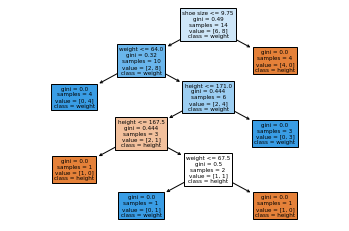

In [60]:
tree_classifier_visualization = tree.plot_tree(tree_classifier,
                                               feature_names=[
                                                   'height', 'weight', 'shoe size'],
                                               class_names=[
                                                   'height', 'weight', 'shoe size'],
                                               filled=True)


Lets also check the accuracy of our modal against our test labels `y_test`

In [61]:
tree_classifier_accuracy = accuracy_score(y_test, tree_classifier_predictions)

print(f"Accuracy of our TreeClassifierModal is {tree_classifier_accuracy * 100}%")


Accuracy of our TreeClassifierModal is 75.0%


#### 2. Logistic Regression 

> Not explained well

Logistic regression is a method used to analyze data where there are only two possible outcomes. For example, for our problem we are providing a person's height, weight and shoe size and predicting if the person is a man or a women.

It works by estimating the probability of an event occurring, such as a student passing the exam. The estimation is done using a special function called a logistic function, which transforms the output of a linear regression model into a probability value between 0 and 1.

In [62]:
# Importing `LogisticRegression` module from `SkLearn`
from sklearn.linear_model import LogisticRegression

# Creating ref of `LogisticRegression`
logistic_regression = LogisticRegression()

# Fitting the training data into our `LogisticRegression` modal
logistic_regression.fit(x_train, y_train)


LogisticRegression()

In [63]:
# Predicting with Logistic Regression with our Test Data
logistic_regression_predictions = logistic_regression.predict(x_test)

print(f"Predicted values are -> {logistic_regression_predictions}")


Predicted values are -> [1 0 1 0]


In [64]:
logistic_regression_accuracy = accuracy_score(
    y_test, logistic_regression_predictions)

print(
    f"Accuracy of our LogisticRegressionModal is {logistic_regression_accuracy * 100}%")


Accuracy of our LogisticRegressionModal is 100.0%


#### 3. RandomForestClassifier

Random Forest Classifier is a popular algorithm that constructs multiple decision trees at training time and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

The decision trees in a Random Forest Classifier are constructed based on a random subset of the training data and a random subset of the input features. This randomness helps to reduce over-fitting and improves the accuracy of the model. The algorithm also uses a technique called bagging (bootstrap aggregating) to combine the predictions of the individual trees.

> TL;DR

The basic idea of the Random Forest Classifier is to combine the results of multiple decision trees to improve the accuracy of the predictions. Each decision tree is trained on a random subset of the data and a random subset of the input features.


In [65]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

random_forest_classifier.fit(x_train, y_train)

RandomForestClassifier()

In [66]:
random_forest_predictions = random_forest_classifier.predict(x_test)

print(f"Predicted values are -> {random_forest_predictions}")

Predicted values are -> [1 1 1 0]


In [77]:
random_forest_accuracy = accuracy_score(
    y_test, random_forest_predictions)

print(
    f"Accuracy of our RandomForestClassifierModal is {random_forest_accuracy * 100}%")


Accuracy of our RandomForestClassifierModal is 75.0%


#### 4. K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a non-parametric machine learning algorithm used for both classification and regression tasks. It is a simple and powerful algorithm that is based on the idea of similarity between data points.

K-Nearest Neighbors (KNN) is a lazy learning algorithm, which means that it does not actually build a model during the training phase. Instead, it stores the entire training dataset in memory and performs the classification or regression task at the time of prediction.

During the training phase, the KNN algorithm simply stores the feature vectors and their corresponding class labels for all the training data points.

Let's consider a simple example to illustrate how K-Nearest Neighbors (KNN) algorithm works:

Suppose we have a dataset of 10 observations with two features - height and weight, and each observation is labeled as either "male" or "female" based on their gender. We want to predict the gender of a new observation based on their height and weight.

Here is our data,

| Height (inches) | Weight (kg's) | Gender |
| --------------- | ------------- | ------ |
| 63              | 119           | Male   |
| 64              | 121           | Female |
| 66              | 132           | Male   |
| 68              | 145           | Female |
| 70              | 162           | Male   |
| 71              | 172           | Male   |
| 73              | 196           | Female |
| 75              | 219           | Male   |
| 76              | 230           | Female |
| 78              | 250           | Male   |

Suppose we want to predict the gender of a new person with height 72 inches and weight 180 pounds using KNN with k=3.

Now to calculate the distance between our input value and dataset value, we can use _Euclidean distance_ formula

`d(x, y) = sqrt(sum((x_i - y_i)^2))`

or

`d = √(x_1 - x_2)^2 + (y_1 - y_2)^2`

however we can also use _Manhattan distance_.

Let's calculate the distance between our input and first entry in data point

```plaintext
d = sqrt((72-63)^2 + (180-119)^2)
  = sqrt(9^2 + 61^2)
  = sqrt(81 + 3721)
  = sqrt(3802)
 ~= 61.67
```

Just like this we'll calculate the distance between our input and for all the data points

| Height (inches) | Weight (pounds) | Distance |
| --------------- | --------------- | -------- |
| 66              | 132             | 40       |
| 68              | 145             | 31       |
| 71              | 172             | 8        |
| 70              | 162             | 18       |
| 73              | 196             | 16       |
| 75              | 219             | 39       |
| 76              | 230             | 50       |
| 78              | 250             | 70       |
| 63              | 119             | 61       |
| 64              | 121             | 59       |

The algorithm would then select the 3 nearest neighbors based on the distance measure. In this case, the three nearest neighbors would be the observations with indices 4, 5, and 6 which are 68, 71 and 70 which all corresponds to males. Hence our output label is `male`


In [70]:
from sklearn.neighbors import KNeighborsClassifier

k_neighbors_classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

k_neighbors_classifier.fit(x_train, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [74]:
k_neighbors_predictions = k_neighbors_classifier.predict(x_test)

print(f"Predicted values are -> {k_neighbors_predictions}")

Predicted values are -> [1 1 1 0]


In [76]:
k_neighbors_accuracy = accuracy_score(
    y_test, k_neighbors_predictions)

print(
    f"Accuracy of our KNeighborsClassifierModal is {k_neighbors_accuracy * 100}%")


Accuracy of our KNeighborsClassifierModal is 75.0%
